Using data from https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns


sns.set(color_codes=True)

In [37]:
df = pd.read_csv('input/train.tsv', sep='\t')

In [38]:
df.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [42]:
df['sale_date'] = pd.to_datetime("'2018-10-20'".replace("'",""))
df['sale_date'] = df['sale_date'].apply(lambda x: x - pd.Timedelta(np.random.randint(1, 365), unit='D'))

category_median = {
    'Women/Jeans/Slim, Skinny': 13,
    'Women/Shoes/Boots': 3,
    'Women/Tops & Blouses/T-Shirts': 5
}
DEFAULT_MEDIAN = 7

not_in_list = ~df['category_name'].isin(category_median.keys())
df['list_date'] = df.loc[not_in_list]['sale_date'].apply(lambda x: x - pd.Timedelta(np.floor(np.random.chisquare(DEFAULT_MEDIAN)), unit='D')) 

for key in list(category_median.keys()):
    index_filter = df['category_name'] == key
    df['list_date'].loc[index_filter] = df[index_filter]['sale_date'].apply(lambda x: x - pd.Timedelta(np.random.chisquare(category_median[key]), unit='D')) #default for all
    
df['time_to_sale'] = df['sale_date'] - df['list_date']
df['time_to_sale'] = df['time_to_sale'].dt.days


C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sale_date,list_date,time_to_sale
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2018-08-09,2018-07-30 00:00:00.000000000,10
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,2017-11-30,2017-11-24 00:00:00.000000000,6
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2018-05-17,2018-05-11 00:00:00.000000000,6
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,2018-01-11,2018-01-06 00:00:00.000000000,5
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,2017-11-15,2017-11-11 00:00:00.000000000,4
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...",2017-10-21,2017-10-14 00:00:00.000000000,7
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,2018-05-27,2018-05-17 00:00:00.000000000,10
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,2017-12-20,2017-12-12 00:00:00.000000000,8
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,2017-12-03,2017-11-19 00:00:00.000000000,14
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...,2018-06-26,2018-06-19 00:00:00.000000000,7


In [44]:
#pd.Series(np.random.random(len(df))) > 0.1

C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\Users\z6mjm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


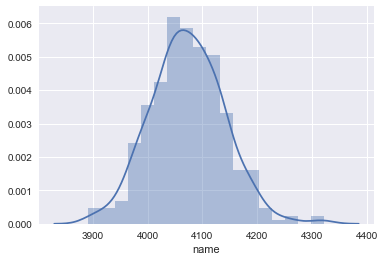

In [45]:
sns.distplot(df.set_index('sale_date').groupby(pd.TimeGrouper('D')).count().dropna()['name'])